## <center>CITS5508 Assignment1</center>

**By: Adharsh Sundaram Soudakar(23796349)**<br>




In [1]:
#Importing all the required functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, log_loss, precision_recall_curve, 
                             f1_score, confusion_matrix, precision_score, recall_score)
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

# to display plots in Jupyter notebook
%matplotlib inline

In [2]:
#Initiating and setting path variables
train_path="C:/Users/adhar/Desktop/sem3/cits5508/assignment_1/FMNIST_training_set.csv"
test_path="C:/Users/adhar/Desktop/sem3/cits5508/assignment_1/FMNIST_test_set.csv"
label_train_path="C:/Users/adhar/Desktop/sem3/cits5508/assignment_1/FMNIST_training_set_labels.csv"
label_test_path="C:/Users/adhar/Desktop/sem3/cits5508/assignment_1/FMNIST_test_set_labels.csv"
df_train=pd.read_csv(train_path,header=None)
df_test=pd.read_csv(test_path,header=None)
df_train_label=pd.read_csv(label_train_path,header=None)
df_test_label=pd.read_csv(label_test_path,header=None)

In [3]:
# filtering the dataset to only sneakers and sandals
train_sandal_rows = df_train_label[0]==5
train_sneaker_rows = df_train_label[0]==7
test_sandal_rows = df_test_label[0]==5
test_sneaker_rows = df_test_label[0]==7
df_train_ss = df_train[train_sandal_rows|train_sneaker_rows]
df_test_ss = df_test[test_sandal_rows|test_sneaker_rows]
df_train_label_ss = df_train_label[train_sandal_rows|train_sneaker_rows]
df_test_label_ss = df_test_label[test_sandal_rows|test_sneaker_rows]
#print(len(df_train_ss),len(df_test_ss),len(df_train_label_ss),len(df_test_label_ss))

In [4]:
#Changing the sneakers and sandals labels to 0 and 1
df_train_label_ss.loc[df_train_label_ss[0] == 7, 0] = 0
df_train_label_ss.loc[df_train_label_ss[0] == 5, 0] = 1
df_test_label_ss.loc[df_test_label_ss[0] == 7, 0] = 0
df_test_label_ss.loc[df_test_label_ss[0] == 5, 0] = 1
#df_train_label_ss[0]=df_train_label_ss[0].replace(7,0)
#df_train_label_ss[0]=df_train_label_ss[0].replace(5,1)

C:\Users\adhar\AppData\Local\Temp\ipykernel_14292\1178082049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_label_ss.loc[df_train_label_ss[0] == 7, 0] = 0
C:\Users\adhar\AppData\Local\Temp\ipykernel_14292\1178082049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_label_ss.loc[df_train_label_ss[0] == 5, 0] = 1
C:\Users\adhar\AppData\Local\Temp\ipykernel_14292\1178082049.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [5]:
#D1
Instances = {
    'Training Set': [len(df_train_ss)],
    'Test Set': [len(df_test_ss)],
    'Total': [len(df_train_ss) + len(df_test_ss)]
}

Instance_table = pd.DataFrame(Instances)
Instance_table

,Training Set,Test Set,Total
0,11988,2000,13988


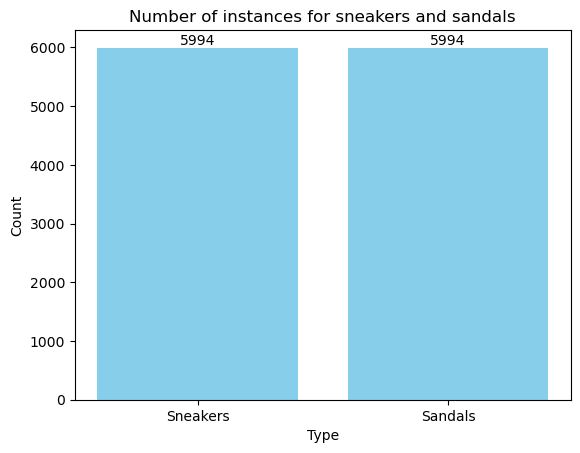

In [14]:
#D2
count=[len(df_train_label_ss.loc[df_train_label_ss[0] == 0, 0]),len(df_train_label_ss.loc[df_train_label_ss[0] == 1, 0])]
categories=['Sneakers','Sandals']

#To display the count values on the top of the bars
for i,value in enumerate(count):
    plt.text(i,value+1,str(value),ha='center',va='bottom')
    
plt.bar(categories,count,color='skyblue')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Number of instances for sneakers and sandals')
plt.show()

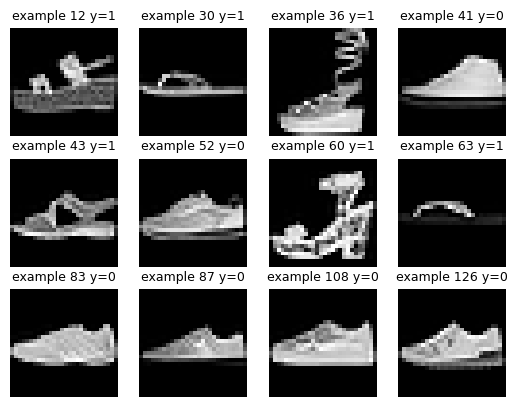

In [15]:
#D3
#Logic to print the first 6 images of each class.
fig, axs = plt.subplots(3, 4)
sandals_count = 0
sneakers_count = 0
subplot_count = 0
for i in range(len(df_train_ss)):
    img =df_train_ss.iloc[i].values.reshape(28, 28)
    value = df_train_label_ss.iloc[i,0]
    if value==1:
        sandals_count+=1
        if sandals_count > 6:
            continue
    else:
        sneakers_count+=1
        if sneakers_count > 6:
            continue
    row = subplot_count // 4
    col = subplot_count % 4
    index = str(df_train_label_ss.index[i])
    axs[row,col].set_title('example '+index+' '+'y='+str(value), fontsize=9)
    axs[row,col].imshow(img, cmap='gray')
    axs[row,col].axis('off')
    subplot_count+=1
plt.show()

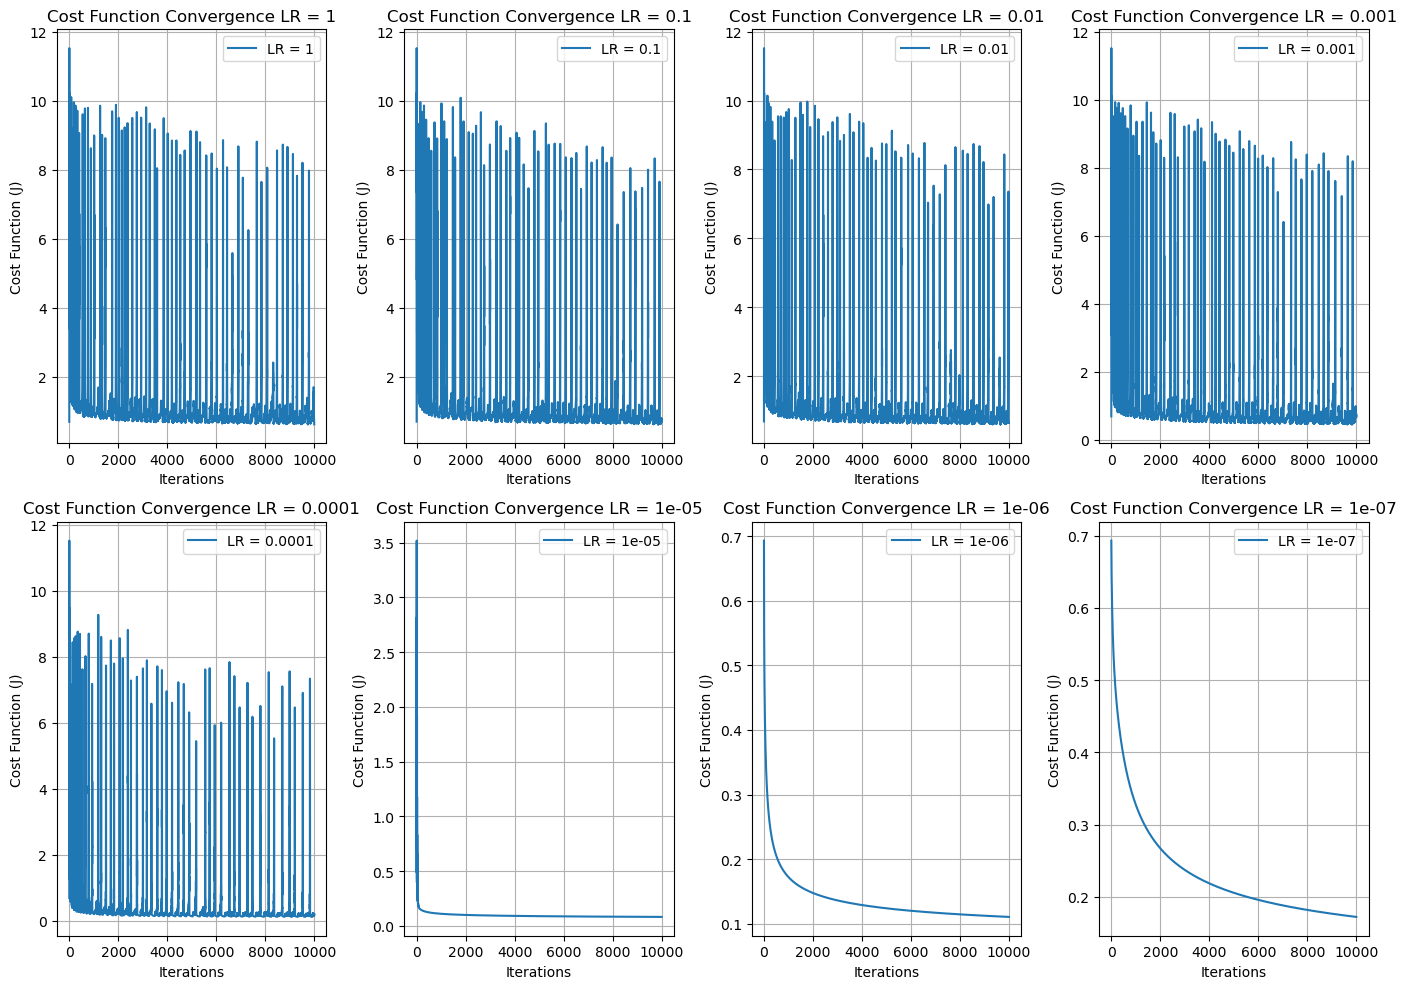

In [27]:
#D4
X = df_train_ss.to_numpy() 
y = df_train_label_ss.to_numpy()  
np.random.seed(5508)

# Split data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=5508)

# Initialize parameters
num_iterations = 10000
learning_rates = [1,1e-1,1e-2, 1e-3, 1e-4, 1e-5,1e-6,1e-7]
cost_histories = {}  # To track cost function values over iterations

# Batch Gradient Descent
for lr in learning_rates:
    theta = np.zeros((X_train.shape[1],1), dtype=np.float64)  # Initialize parameter vector
    cost_history = []  # To track cost function values over iterations
    
    for iteration in range(num_iterations):
        # Compute estimated probability for each instance
        z = X_train.dot(theta)
        estimated_p = 1 / (1 + np.exp(-z))
    
        # Calculate gradient vector
        gradient = (1 / len(X_train)) * X_train.T.dot(estimated_p - y_train)
    
        # Update parameter vector
       # theta -= learning_rate * gradient
        theta -= lr * gradient
        # Calculate logistic regression cost function
        #1e-10 to eliminate division by zero error
        cost = -(1 / len(X_train)) * np.sum(y_train * np.log(estimated_p+1e-10) + (1 - y_train) * np.log(1 - estimated_p+1e-10))
        cost_history.append(cost)
    
    cost_histories[lr] = cost_history

#Plots for differnet learning rates
fig, axs = plt.subplots(2, 4, figsize=(14, 10))

for i, (lr, history) in enumerate(cost_histories.items()):
    row = i // 4
    col = i % 4
    axs[row, col].plot(range(num_iterations), history, label=f"LR = {lr}")
    axs[row, col].set_xlabel("Iterations")
    axs[row, col].set_ylabel("Cost Function (J)")
    axs[row, col].set_title(f"Cost Function Convergence LR = {lr}")
    axs[row, col].legend()
    axs[row, col].grid(True)

plt.tight_layout()
plt.show()


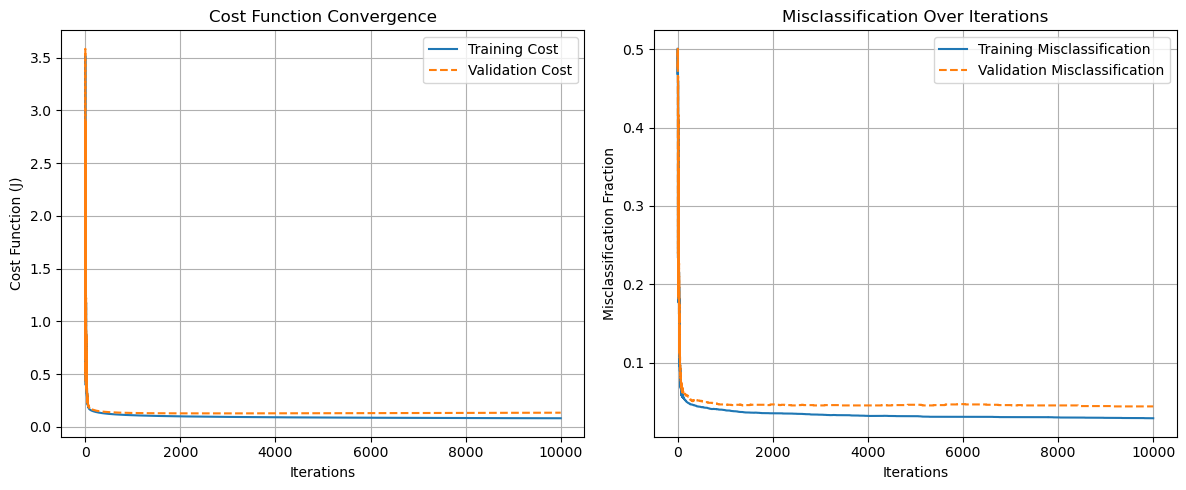

In [19]:
#D5
# Initialize parameters
learning_rate = 1e-5
num_iterations = 10000
theta = np.zeros((X_train.shape[1],1),dtype=np.float64)  # Initialize parameter vector
threshold = 0.5

cost_history_train = []  # To track cost function values over iterations for training set
cost_history_val = []    # To track cost function values over iterations for validation set

# Initialize lists to track misclassification rates
misclassification_history_train = []
misclassification_history_val = []

# Batch Gradient Descent with tracking of misclassification rate
for iteration in range(num_iterations):
    
    # Compute estimated probability for training and validation sets
    z_train = X_train.dot(theta)
    estimated_p_train = 1 / (1 + np.exp(-z_train))
    z_val = X_val.dot(theta)
    estimated_p_val = 1 / (1 + np.exp(-z_val))
    
    # Calculate gradient vector
    gradient = (1 / len(X_train)) * X_train.T.dot(estimated_p_train - y_train)
    
    # Update parameter vector
    theta -= learning_rate * gradient
    
    # Calculate logistic regression cost function for training and validation sets
    cost_train = -(1 / len(X_train)) * np.sum(y_train * np.log(estimated_p_train+1e-10) + (1 - y_train) * np.log(1 - estimated_p_train+1e-10))
    cost_val = -(1 / len(X_val)) * np.sum(y_val * np.log(estimated_p_val+1e-10) + (1 - y_val) * np.log(1 - estimated_p_val+1e-10))
    cost_history_train.append(cost_train)
    cost_history_val.append(cost_val)
    
    # Calculate misclassification rate for training and validation sets
    y_train_pred = (estimated_p_train >= threshold).astype(int)
    y_val_pred = (estimated_p_val >= threshold).astype(int)
    misclassification_history_train.append(1 - accuracy_score(y_train, y_train_pred))
    misclassification_history_val.append(1 - accuracy_score(y_val, y_val_pred))

#Custom function that will be of use for D14
def customlr1_predict(X, theta, threshold=0.5):
    
    # Compute the estimated probabilities using the logistic function
    z = X.dot(theta)
    estimated_p = 1 / (1 + np.exp(-z))
    
    # Convert probabilities to binary predictions based on the threshold
    predictions = (estimated_p >= threshold).astype(int)
    
    return predictions

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot cost function history
axes[0].plot(range(num_iterations), cost_history_train, label='Training Cost')
axes[0].plot(range(num_iterations), cost_history_val, label='Validation Cost', linestyle='--')
axes[0].set_xlabel('Iterations')
axes[0].set_ylabel('Cost Function (J)')
axes[0].set_title('Cost Function Convergence')
axes[0].legend()
axes[0].grid(True)

# Plot misclassification history
axes[1].plot(range(num_iterations), misclassification_history_train, label='Training Misclassification')
axes[1].plot(range(num_iterations), misclassification_history_val, label='Validation Misclassification', linestyle='--')
axes[1].set_xlabel('Iterations')
axes[1].set_ylabel('Misclassification Fraction')
axes[1].set_title('Misclassification Over Iterations')
axes[1].legend()
axes[1].grid(True)

# Display the plots
plt.tight_layout()
plt.show()


C:\Users\adhar\miniconda3\envs\cits5508-2024\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adhar\miniconda3\envs\cits5508-2024\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

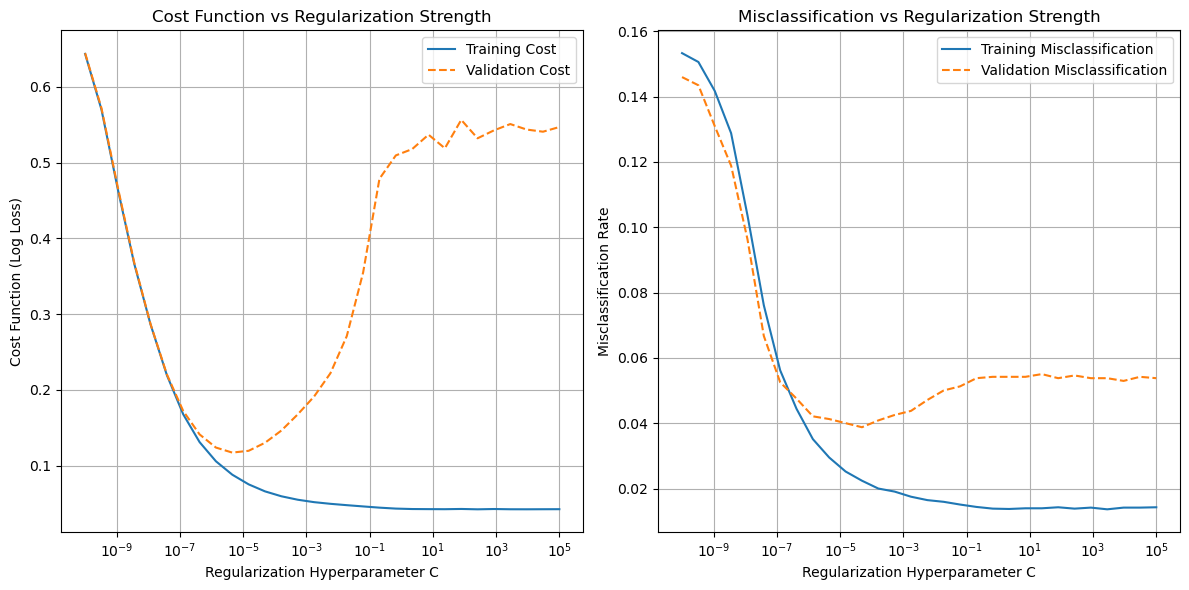

In [121]:
#D7
# Define the range for the regularization hyperparameter C
C_range = np.logspace(-10, 5, 30)
train_costs = []
val_costs = []
train_misclassifications = []
val_misclassifications = []

for C in C_range:
    # Create logistic regression model with L2 regularization
    model = LogisticRegression(C=C, penalty='l2', max_iter=10000, random_state=5508)
    
    # Train the model
    model.fit(X_train, y_train.ravel())
    
    # Predict probabilities for training and validation sets
    prob_train = model.predict_proba(X_train)
    prob_val = model.predict_proba(X_val)
    
    # Compute the cost function (log loss) on the training and validation sets
    train_cost = log_loss(y_train, prob_train)
    val_cost = log_loss(y_val, prob_val)
    train_costs.append(train_cost)
    val_costs.append(val_cost)
    
    # Compute the misclassification rate (1 - accuracy) on the training and validation sets
    # default threashold value is 0.5, hence checking against 0.5 step was skipped
    train_misclassification = 1 - accuracy_score(y_train, model.predict(X_train))
    val_misclassification = 1 - accuracy_score(y_val, model.predict(X_val))
    train_misclassifications.append(train_misclassification)
    val_misclassifications.append(val_misclassification)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Left plot: Cost function values for each C value
ax1.semilogx(C_range, train_costs, label='Training Cost')
ax1.semilogx(C_range, val_costs, label='Validation Cost', linestyle='--')
ax1.set_xlabel('Regularization Hyperparameter C')
ax1.set_ylabel('Cost Function (Log Loss)')
ax1.set_title('Cost Function vs Regularization Strength')
ax1.legend()
ax1.grid(True)

# Right plot: Misclassification rates for each C value
ax2.semilogx(C_range, train_misclassifications, label='Training Misclassification')
ax2.semilogx(C_range, val_misclassifications, label='Validation Misclassification', linestyle='--')
ax2.set_xlabel('Regularization Hyperparameter C')
ax2.set_ylabel('Misclassification Rate')
ax2.set_title('Misclassification vs Regularization Strength')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

C:\Users\adhar\miniconda3\envs\cits5508-2024\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adhar\miniconda3\envs\cits5508-2024\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

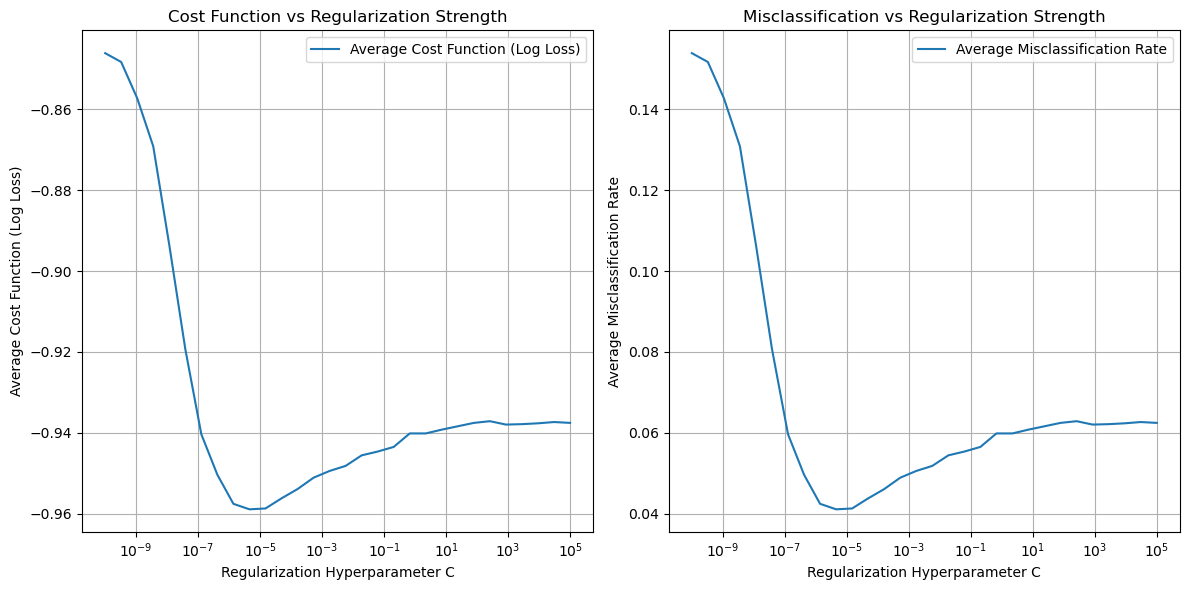

In [53]:
#D8
# Define the range for the regularization hyperparameter C
C_range = np.logspace(-10, 5, 30)

# Create logistic regression model with L2 regularization using cross-validation
model_cv = LogisticRegressionCV(Cs=C_range, cv=10, penalty='l2', max_iter=10000, random_state=5508, scoring='accuracy')

# Fit the model
model_cv.fit(X_train, y_train.ravel())

# Extract the mean log loss scores for each C value
mean_log_loss_scores = -model_cv.scores_[1].mean(axis=0)

# Extract the mean accuracy for each C value and compute misclassification rate
# default threashold value is 0.5, hence checking against 0.5 step was skipped
mean_accuracy_scores = model_cv.scores_[1].mean(axis=0)
mean_misclassification_rates = 1 - mean_accuracy_scores

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Left plot: Average cost function values for each C value
ax1.semilogx(C_range, mean_log_loss_scores, label='Average Cost Function (Log Loss)')
ax1.set_xlabel('Regularization Hyperparameter C')
ax1.set_ylabel('Average Cost Function (Log Loss)')
ax1.set_title('Cost Function vs Regularization Strength')
ax1.legend()
ax1.grid(True)

# Right plot: Average misclassification rates for each C value
ax2.semilogx(C_range, mean_misclassification_rates, label='Average Misclassification Rate')
ax2.set_xlabel('Regularization Hyperparameter C')
ax2.set_ylabel('Average Misclassification Rate')
ax2.set_title('Misclassification vs Regularization Strength')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


In [33]:
#D10
# Define the parameter grid for the regularization parameter 'alpha'(Inverse of C)
param_grid = {
    'alpha': 1 / np.logspace(-10, 5, 30)
}

# Create a logistic regression model with SGDClassifier
logistic_model = SGDClassifier(loss='log_loss', max_iter=10000, random_state=5508)

# Create GridSearchCV object with accuracy as the scoring metric
grid_search = GridSearchCV(logistic_model, param_grid, scoring='accuracy', cv=10)

# Fit the model
grid_search.fit(X_train, y_train.ravel())

#Get the best model
best_model = grid_search.best_estimator_

# Make predictions using the best model
train_pred = best_model.predict(X_train)
val_pred = best_model.predict(X_val)

# Calculate the cost functions for the training set and validation set
train_cost = log_loss(y_train, best_model.predict_proba(X_train))
val_cost = log_loss(y_val, best_model.predict_proba(X_val))

# Calculate the misclassifications
train_mc = 1 - accuracy_score(y_train, train_pred)
val_mc = 1 - accuracy_score(y_val, val_pred)

# Get the best regularization parameter
best_alpha = grid_search.best_params_['alpha']
best_C = 1/best_alpha

best_parameter = {
    'Best C': [best_C],
    'Best alpha': [best_alpha],
    'Train Set CF': [train_cost],
    'Validation Set CF': [val_cost],
    'MC rate in train set': [train_mc],
    'MC rate in validation set': [val_mc]
}

BestParameters = pd.DataFrame(best_parameter)
BestParameters

,Best C,Best alpha,Train Set CF,Validation Set CF,MC rate in train set,MC rate in validation set
0,0.062102,16.10262,0.092701,0.13112,0.033994,0.047123


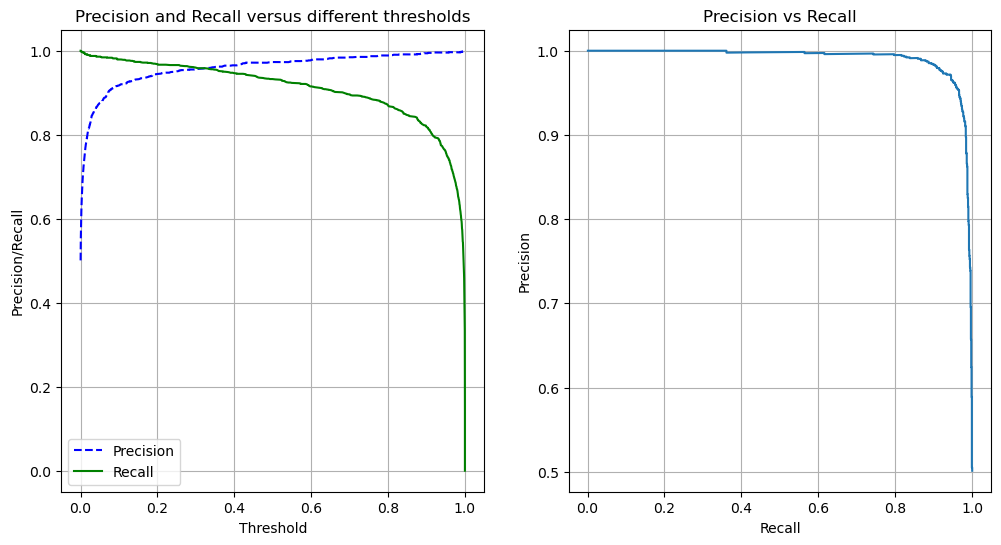

In [52]:
#D12
#Creating a model with best C
logistic_model_with_best_alpha = SGDClassifier(loss='log_loss',alpha=best_alpha,max_iter=10000,random_state=5508)

#Fit the model
logistic_model_with_best_alpha.fit(X_train,y_train.ravel())

#Predict probabilities on validation set
y_score = logistic_model_with_best_alpha.predict_proba(X_val)[:,1]

#Get precision-recall pari
precisions, recalls, thresholds = precision_recall_curve(y_val,y_score)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(thresholds, precisions[:-1], "b--", label="Precision")
ax1.plot(thresholds, recalls[:-1], "g-", label="Recall")
ax1.set_xlabel("Threshold")
ax1.set_ylabel("Precision/Recall")
ax1.set_title("Precision and Recall versus different thresholds")
ax1.legend(loc="best")
ax1.grid(True)

ax2.plot(recalls[:-1], precisions[:-1])
ax2.set_xlabel("Recall")
ax2.set_ylabel("Precision")
ax2.set_title("Precision vs Recall")
ax2.grid(True)


In [35]:
#D13
# Defining a range of threshold values to search
thresholds = np.linspace(0, 1, 100)

# Initialize the best threshold value and the highest F1 score
threshold_best = 0
f1_best = 0

# Perform grid search over the threshold values
for threshold in thresholds:
    
    # Convert probabilities to binary predictions using the current threshold
    y_pred = (logistic_model_with_best_alpha.predict_proba(X_val)[:, 1] >= threshold).astype(int)
    
    # Calculate the F1 score for the current threshold
    f1 = f1_score(y_val, y_pred)
    
    # Update the best threshold if the current F1 score is higher
    if f1 > f1_best:
        f1_best = f1
        threshold_best = threshold

# Print the best threshold value and the highest F1 score
print(f"The best threshold value obtained from the grid search is: {threshold_best}")
print(f"The highest F1 score for the validation set is: {f1_best}")

The best threshold value obtained from the grid search is: 0.27272727272727276
The highest F1 score for the validation set is: 0.9590062111801242


In [57]:
#D14
X_test = df_test_ss.to_numpy()
y_test = df_test_label_ss.to_numpy()

# Predictions using LR1 on test set
lr1_predictions_on_test = customlr1_predict(X_test, theta, threshold=0.5)

# Creating LR2 model with best C
lr2_model = LogisticRegression(C=best_C, penalty='l2', max_iter=10000, random_state=5508)
lr2_model.fit(X_train,y_train.ravel())
lr2_predictions_on_test = lr2_model.predict(X_test)

# Creating LR3 model with best C but keeping threshold value as 0.5
lr3_model = LogisticRegressionCV(Cs=[best_C], cv=10, penalty='l2', max_iter=10000, random_state=5508, scoring='accuracy')
lr3_model.fit(X_train,y_train.ravel())
lr3_predictions_on_test = lr3_model.predict(X_test)

#Creating LR4 model with best C and using the optimal threshold value
lr4_model = SGDClassifier(loss='log_loss', alpha=best_alpha, max_iter=10000, random_state=5508)
param_value = {'alpha':[best_alpha]}
grid_search4 = GridSearchCV(lr4_model, param_value, scoring='accuracy', cv=10)
grid_search4.fit(X_train, y_train.ravel())
best_model4 = grid_search4.best_estimator_
prob_est = best_model4.predict_proba(X_test)
lr4_predictions_on_test = (prob_est[:, 1] >= threshold_best).astype(int)

#Function to find the required metrics
def find_metrics(y_correct,y_pred):
    conf_mat = confusion_matrix(y_correct,y_pred)
    precision = precision_score(y_correct,y_pred)
    recall = recall_score(y_correct,y_pred)
    FP = conf_mat[0,1]
    TN = conf_mat[0,0]
    fpr = FP / float(FP+TN) 
    return conf_mat, precision, recall, fpr
    
#Calling the find_metrics function to get the metrics forr each LR
lr1_metrics = find_metrics(y_test,lr1_predictions_on_test)
lr2_metrics = find_metrics(y_test,lr2_predictions_on_test)
lr3_metrics = find_metrics(y_test,lr3_predictions_on_test)
lr4_metrics = find_metrics(y_test,lr4_predictions_on_test)

# Output the metrics for LR1 model
print(f"LR1: Confusion Matrix:\n{lr1_metrics[0]}")
print(f"LR1: Precision: {lr1_metrics[1]}, Recall: {lr1_metrics[2]}, False Positive Rate: {lr1_metrics[3]}\n")
# Output the metrics for LR2 model
print(f"LR2: Confusion Matrix:\n{lr2_metrics[0]}")
print(f"LR2: Precision: {lr2_metrics[1]}, Recall: {lr2_metrics[2]}, False Positive Rate: {lr2_metrics[3]}\n")
# Output the metrics for LR3 model
print(f"LR3: Confusion Matrix:\n{lr3_metrics[0]}")
print(f"LR3: Precision: {lr3_metrics[1]}, Recall: {lr3_metrics[2]}, False Positive Rate: {lr3_metrics[3]}\n")
# Output the metrics for LR4 model
print(f"LR4: Confusion Matrix:\n{lr4_metrics[0]}")
print(f"LR4: Precision: {lr4_metrics[1]}, Recall: {lr4_metrics[2]}, False Positive Rate: {lr4_metrics[3]}\n")

C:\Users\adhar\miniconda3\envs\cits5508-2024\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adhar\miniconda3\envs\cits5508-2024\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

LR1: Confusion Matrix:
[[968  32]
 [ 87 913]]
LR1: Precision: 0.9661375661375662, Recall: 0.913, False Positive Rate: 0.032

LR2: Confusion Matrix:
[[950  50]
 [ 62 938]]
LR2: Precision: 0.9493927125506073, Recall: 0.938, False Positive Rate: 0.05

LR3: Confusion Matrix:
[[949  51]
 [ 63 937]]
LR3: Precision: 0.9483805668016194, Recall: 0.937, False Positive Rate: 0.051

LR4: Confusion Matrix:
[[954  46]
 [ 40 960]]
LR4: Precision: 0.9542743538767395, Recall: 0.96, False Positive Rate: 0.046



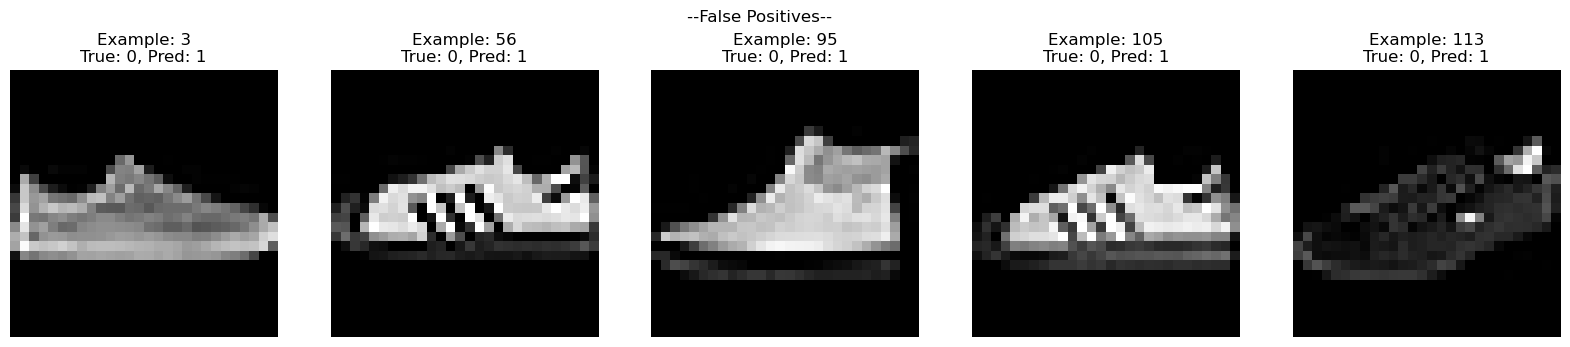

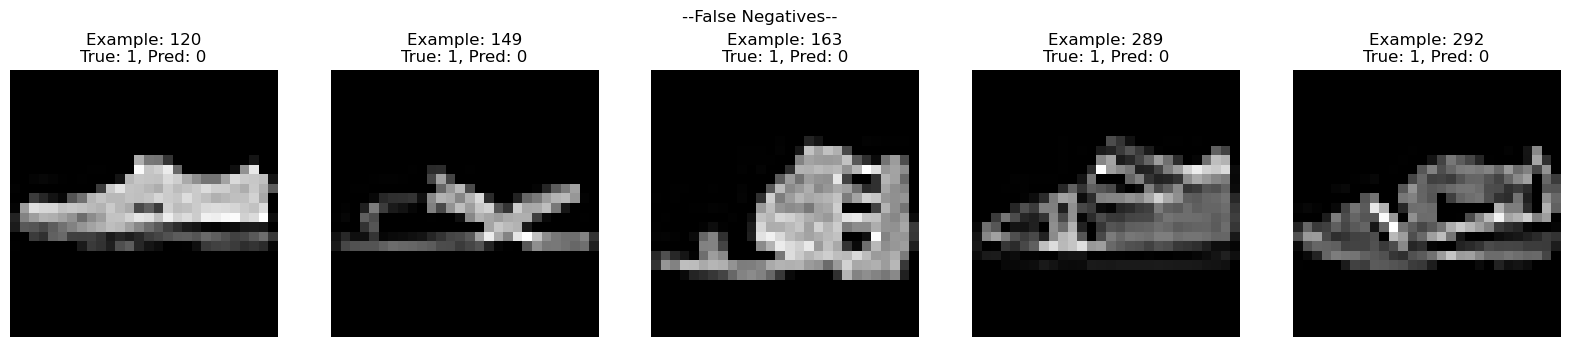

In [59]:
#D16
# Extract false positives (FP) and false negatives (FN) indices
raveled_y_test = np.ravel(y_test, order='K')
FP_indices = np.where((lr4_predictions_on_test == 1) & (raveled_y_test == 0))[0][:5]
FN_indices = np.where((lr4_predictions_on_test == 0) & (raveled_y_test == 1))[0][:5]

# Function to display images in a grid
def display_images_side_by_side(indices, image_data, true_labels, predicted_labels, title):
    plt.figure(figsize=(20, 4))
    for i, index in enumerate(indices):
        plt.subplot(1, len(indices), i + 1)  # To fit subplots in a row
        plt.imshow(image_data[index].reshape(28, 28), cmap='gray') 
        plt.title(f"Example: {index}\nTrue: {true_labels[index]}, Pred: {predicted_labels[index]}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Display all false positive images side by side
display_images_side_by_side(FP_indices, X_test, raveled_y_test, lr4_predictions_on_test, "--False Positives--\n")

# Display all false negative images side by side
display_images_side_by_side(FN_indices, X_test, raveled_y_test, lr4_predictions_on_test, "--False Negatives--\n")

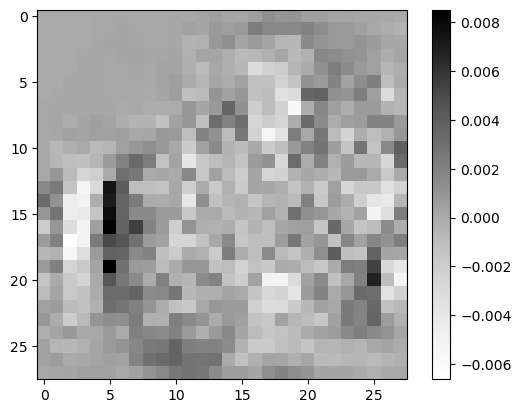

In [58]:
#D18
coefficients=best_model4.coef_

# Reshape the coefficients into a 28 x 28 matrix
weights_matrix = coefficients.reshape(28, 28)

# imshow to visualize the weights matrix
plt.imshow(weights_matrix, cmap='Greys', interpolation='none')
plt.colorbar()  
plt.show()

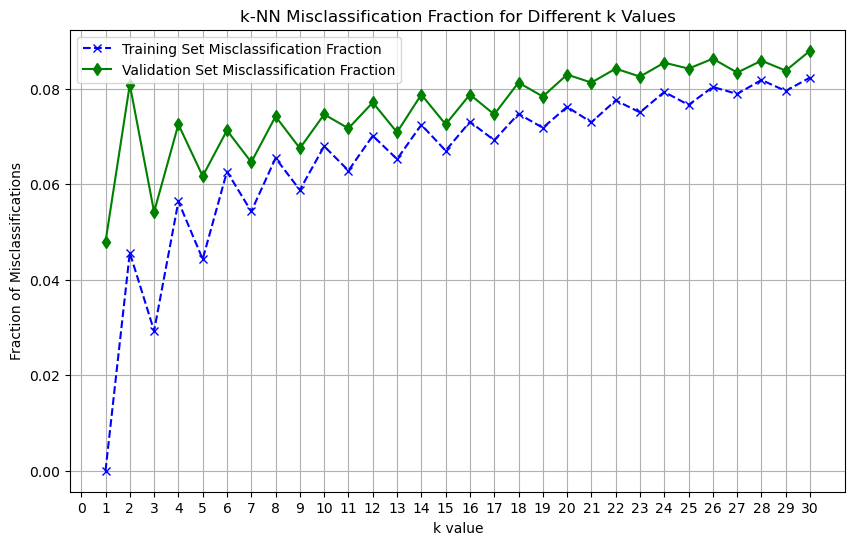

In [60]:
#D20
# Range of k values
k_values = range(1, 31)

# Lists to store misclassification fractions for training and validation sets
train_errors = []
val_errors = []

# Iterate over all k values
for k in k_values:
    # Create k-NN classifier with Euclidean distance
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    
    # Train the classifier
    knn.fit(X_train, y_train.ravel())
    
    # Predict on training set
    y_train_pred = knn.predict(X_train)
    
    # Predict on validation set
    y_val_pred = knn.predict(X_val)
    
    # Calculate misclassification fraction for training set
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    train_errors.append(train_error)
    
    # Calculate misclassification fraction for validation set
    val_error = 1 - accuracy_score(y_val, y_val_pred)
    val_errors.append(val_error)
    
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors,"b--", label='Training Set Misclassification Fraction', marker='x')
plt.plot(k_values, val_errors, "g-", label='Validation Set Misclassification Fraction', marker='d')
plt.xticks(ticks=range(0, 31, 1),labels=range(0,31,1))
plt.xlabel('k value')
plt.ylabel('Fraction of Misclassifications')
plt.title('k-NN Misclassification Fraction for Different k Values')
plt.legend()
plt.grid(True)
plt.show()


In [62]:
#D22

#best k value
best_k = 9
# Create k-NN classifier with the best k value
knn_best = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')

# Train the classifier on the training set
knn_best.fit(X_train, y_train.ravel())

# Predict on the test set
y_test_pred = knn_best.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Calculate precision and recall
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

FP_knn = conf_matrix[0][1]
TN_knn = conf_matrix[0][0]

# Calculate False Positive Rate (FPR)
fpr = FP_knn / (FP_knn + TN_knn)

# Print the results
print(f"---For k = {best_k}, the metrics are---")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"False Positive Rate: {fpr}")

---For k = 9, the metrics are---
Confusion Matrix:
[[998   2]
 [147 853]]
Precision: 0.9976608187134502
Recall: 0.853
False Positive Rate: 0.002
